Here are the detailed instructions on how to complete the task.

First, import required libraries.

Install the modules.

In [13]:
!pip install --upgrade pip
!pip install imutils
!pip install opencv-python

In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from IPython.display import Image
from imutils import paths
import numpy as np
import cv2
import os

To process images, obtain their histograms in order to find the intensity distribution. It can be done as follows.

In [15]:
def extract_histogram(image, bins=(8, 8, 8)):
    hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

Count the images in the root folder ‘train’ and calculate the histogram for each image. Next, separate labels from images. Cloud processing of images takes time (1-5 minutes).

In [16]:
imagePaths = sorted(list(paths.list_images('train')))
data = []
labels = []

for (i, imagePath) in enumerate(imagePaths):
    image = cv2.imread(imagePath, 1)
    label = imagePath.split(os.path.sep)[-1].split(".")[0]
    hist = extract_histogram(image)
    data.append(hist)
    labels.append(label)

Convert the labels into the convenient format 0 and 1 to find the code and label that correspond to a random image.

0


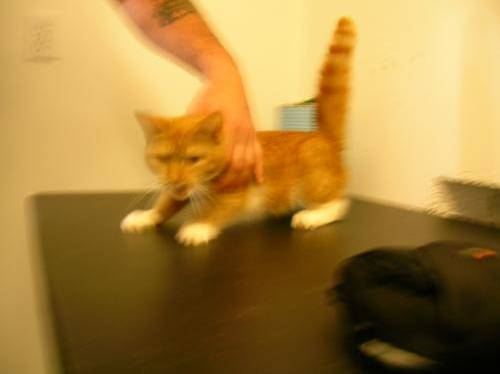

In [17]:
le = LabelEncoder()
labels = le.fit_transform(labels)
print(labels[0])
Image(filename=imagePaths[0])

0 stands for cats. Split the sample into training and test samples in a ratio of 75 to 25 with the parameter random_state = 51.

In [18]:
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(data), labels, test_size=0.25, random_state=10)

Train the model of the almost separating hyperplane on the data and evaluate it using the test data. The parameter C is proportional to the model parameter discussed in the module.

In [19]:
model = LinearSVC(random_state = 10, C = 1.27)
model.fit(trainData, trainLabels)

LinearSVC(C=1.27, random_state=10)

In [20]:
predictions = model.predict(testData)

In [21]:
print(classification_report(testLabels, predictions, target_names=le.classes_))

              precision    recall  f1-score   support

         cat       0.62      0.67      0.64        12
         dog       0.67      0.62      0.64        13

    accuracy                           0.64        25
   macro avg       0.64      0.64      0.64        25
weighted avg       0.64      0.64      0.64        25



In [22]:
from sklearn.metrics import f1_score
predictions = model.predict(testData)
f1_score(testLabels, predictions, average='macro')

0.64

Print the coefficient $\theta_1$ of the constructed hyperplane: 

In [26]:
model.coef_

array([[-1.11479354e-01, -3.15171533e-01, -2.46831493e-01,
        -4.36902523e-01, -6.13529670e-01, -3.54150456e-01,
        -3.74835144e-01, -1.25947648e-01,  8.18422976e-01,
         2.85639440e-01, -3.31814568e-01,  3.58090197e-02,
         2.18955757e-02, -1.47201539e-02, -1.66285612e-02,
        -5.22200782e-01,  2.69477417e-02,  4.91894127e-01,
         4.00309725e-02, -1.18363793e-01,  3.94231618e-01,
        -3.99224905e-02, -3.88763509e-03, -1.18775437e-03,
         0.00000000e+00,  2.84266019e-02,  6.34592921e-02,
        -1.40369055e-02,  1.43126197e-01,  4.07253679e-01,
        -1.47784702e-01, -6.84979656e-03,  0.00000000e+00,
         7.53430945e-04,  1.96741006e-03,  9.11024860e-04,
         1.29609796e-03,  7.53819236e-04, -5.94527451e-02,
        -2.49221374e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  2.04879776e-05,  7.79611593e-05,
         2.07843082e-03,  6.94422524e-04, -1.26380007e-04,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+0

Calculate the predictions for an object in the test folder:

In [24]:
singleImage = cv2.imread('prediction/cat.1037.jpg')
histt = extract_histogram(singleImage)
histt2 = histt.reshape(1, -1)
prediction = model.predict(histt2)

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\histogram.cpp:160: error: (-215:Assertion failed) j < nimages in function 'cv::histPrepareImages'


In [ ]:
Image(filename='test/cat.1016.jpg')

In [ ]:
prediction

The constructed classifier has successfully completed the task.